In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
accidents_persona= pd.read_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_persones.csv")

### Check the table, what I need and what I dont need, understand the information I have

In [3]:
accidents_persona.head()

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0  2023S000001                  3  Sants-Montjuïc                 18   
1  2023S000003                  1    Ciutat Vella                  1   
2  2023S000005                  6          Gràcia                 31   
3  2023S000006                  6          Gràcia                 31   
4  2023S000007                  3  Sants-Montjuïc                 12   

            Neighborhood_Name  Street_Code  \
0                       Sants        30602   
1                    el Raval        67307   
2           la Vila de Gràcia       282401   
3           la Vila de Gràcia       206403   
4  la Marina del Prat Vermell          180   

                                         Street_Name Postal_Code Day_of_Week  \
0                                              Badal   0186 0186      Sunday   
1                                              Carme   0075 0079      Sunday   
2  Riera de Sant Miquel / Sèneca                 ...   0017 0017      Sunday   
3  Gran de Gràcia / Gràcia                       ...   0072 0072      Sunday   
4  Ramon Albó                                    ...   0093 0093      Sunday   

   Year  ...  Age Person_Type_Description  \
0  2023  ...   57              Pedestrian   
1  2023  ...   45              Pedestrian   
2  2023  ...   45                  Driver   
3  2023  ...   49                  Driver   
4  2023  ...   27                  Driver   

            Pedestrian_Accident_Location_Description  \
0  En zona peatonal                              ...   
1  Fora del pas                                  ...   
2  Desconegut                                    ...   
3  Desconegut                                    ...   
4  Desconegut                                    ...   

  Pedestrian_Movement_Reason_Description  Driver_Movement_Reason_Description  \
0                                Unknown                             Unknown   
1                                Unknown                             Unknown   
2                                Unknown                             Unknown   
3                                Unknown                             Unknown   
4                                Unknown                             Unknown   

                           Victimization_Description UTM_X_Coordinate  \
0      Serious injury: Hospitalization over 24 hours       427409.24    
1       Minor injury: Hospitalization up to 24 hours       430479.42    
2       Minor injury: Hospitalization up to 24 hours       429637.2     
3  Minor injury: Medical assistance at accident site       429497.51    
4       Minor injury: Hospitalization up to 24 hours       431331.37    

  UTM_Y_Coordinate Longitude   Latitude  
0       4580907.46  2.130813  41.374565  
1       4581533.3   2.167452  41.380473  
2       4583426.13  2.157161  41.397448  
3       4583693.13  2.155459  41.399841  
4       4586678.86  2.177056  41.426891  

[5 rows x 28 columns]

### Create dictionary with trasnlations catalan to english 

In [6]:
# Load your dataset
file_path = "/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_persones.csv" 
accidents_persona = pd.read_csv(file_path)

# Define translations
translation_dict = {
    "Conductor": "Driver", 'Vianant': 'Pedestrian', 'Passatger': 'Passenger', 'En pas regulat per semŕfor': 'In crossing regulated by traffic lights',
    'En pas sense regular ': 'In unregulated crossing', 'Fora del pas': 'Outside the crossing', 
    "A la vorera / Andana":"On the sidewalk", "En zona peatonal":'In pedestrian area',
    "En pas sense senyalitzar":"At an unmarked crossing",
    "Altres":"Others",
    "Dilluns": "Monday", "Dimarts": "Tuesday", "Dimecres": "Wednesday",
    "Dijous": "Thursday", "Divendres": "Friday", "Dissabte": "Saturday", "Diumenge": "Sunday",
    "Gener": "January", "Febrer": "February", "Març": "March", "Abril": "April",
    "Maig": "May", "Juny": "June", "Juliol": "July", "Agost": "August",
    "Setembre": "September", "Octubre": "October", "Novembre": "November", "Desembre": "December",
    "Il.lčs": "Uninjured", 
    "Ferit lleu: Hospitalització fins a 24h": "Minor injury: Hospitalization up to 24 hours",
    "Ferit lleu: Amb assistčncia sanitŕria en lloc d'accident": "Minor injury: Medical assistance at accident site",
    "Ferit lleu: Rebutja assistčncia sanitŕria": "Minor injury: Refused medical assistance",
    "Ferit greu: hospitalització superior a 24h": "Serious injury: Hospitalization over 24 hours",
    "Mort (dins 24h posteriors accident)": "Death (within 24 hours of accident)",
    "Mort (després de 24h posteriors accident)": "Death (after 24 hours of accident)",
    "Es desconeix": "Unknown", "Desconegut": "Unknown", "Altres": "Others", 
    "Taxi": "Taxi", "Turisme": "Car", "Motocicleta": "Motorcycle",     'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing',  "Ferit lleu: Amb assistència sanitària en lloc d'accident": "Minor injury: Medical assistance at accident site",
    "Death (within 24 hours of accident)": "Death (within 24 hours of accident)",
    "Ferit lleu: Rebutja assistència sanitària": "Minor injury: Refused medical assistance",
    "Mort natural": "Natural death", 'Dona' : 'Women', 'Home' : 'Men','En zona peatonal': 'In pedestrian area',
    'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing', 
    'En zona peatonal': 'In pedestrian area',
    'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing', 
    'Desconegut' : 'Unknown', 'Fora del pas': 'Outside the crossing', "Oci i entreteniment": "Leisure and entertainment",
    "Altres activitats": "Other activities",
    "In itinere": "Commuting",
    "En missió": "On a mission",
    "Estudiant cap a centre d'estudis": "Student heading to an educational center",
    "In itínere": "Commuting",
    "Servei de neteja, recollida d'escombraries": "Cleaning service, garbage collection",
    "Servei de manteniment viari": "Road maintenance service", "No és causa del  vianant": "Not caused by the pedestrian",
    "Desobeir el senyal del semàfor": "Disobeying the traffic light signal",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing",
    "Others": "Others",
    "Transitar a peu per la calçada": "Walking on the road",
    "Desobeir altres senyals": "Disobeying other signals", "No és causa del  vianant": "Not caused by the pedestrian",
    "Desobeir el senyal del semàfor": "Disobeying the traffic light signal",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing",
    "Others": "Others",
    "Transitar a peu per la calçada": "Walking on the road",
    "Desobeir altres senyals": "Disobeying other signals"
    
    

}

# Apply the translations
accidents_persona.replace(translation_dict, inplace=True)



In [154]:
accidents_persona

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0     2023S000001                  3  Sants-Montjuïc                 18   
1     2023S000003                  1    Ciutat Vella                  1   
2     2023S000005                  6          Gràcia                 31   
3     2023S000006                  6          Gràcia                 31   
4     2023S000007                  3  Sants-Montjuïc                 12   
...               ...            ...             ...                ...   
8771  2023S007739                  6          Gràcia                 32   
8772  2023S007740                  4       Les Corts                 20   
8773  2023S007740                  4       Les Corts                 20   
8774  2023S007741                  4       Les Corts                 20   
8775  2023S007742                  4       Les Corts                 20   

                       Neighborhood_Name  Street_Code  \
0                                  Sants        30602   
1                               el Raval        67307   
2                      la Vila de Gràcia       282401   
3                      la Vila de Gràcia       206403   
4             la Marina del Prat Vermell          180   
...                                  ...          ...   
8771  el Camp d'en Grassot i Gràcia Nova       297001   
8772          la Maternitat i Sant Ramon       144601   
8773          la Maternitat i Sant Ramon       144601   
8774          la Maternitat i Sant Ramon       244209   
8775          la Maternitat i Sant Ramon       701434   

                                            Street_Name Postal_Code  \
0                                                 Badal   0186 0186   
1                                                 Carme   0075 0079   
2     Riera de Sant Miquel / Sèneca                 ...   0017 0017   
3     Gran de Gràcia / Gràcia                       ...   0072 0072   
4     Ramon Albó                                    ...   0093 0093   
...                                                 ...         ...   
8771                           Sant Antoni Maria Claret   0045 0045   
8772                                           Diagonal   0687 0687   
8773                                           Diagonal   0687 0687   
8774                                         Joan XXIII   0017 0017   
8775                                   Mig (Descendent)   000220000   

     Day_of_Week  Year  ...  Age Person_Type_Description  \
0         Sunday  2023  ...   57              Pedestrian   
1         Sunday  2023  ...   45              Pedestrian   
2         Sunday  2023  ...   45                  Driver   
3         Sunday  2023  ...   49                  Driver   
4         Sunday  2023  ...   27                  Driver   
...          ...   ...  ...  ...                     ...   
8771      Friday  2023  ...   30                  Driver   
8772    Saturday  2023  ...   57                  Driver   
8773    Saturday  2023  ...   72                  Driver   
8774      Friday  2023  ...   32                  Driver   
8775      Friday  2023  ...   40                  Driver   

               Pedestrian_Accident_Location_Description  \
0     En zona peatonal                              ...   
1     Fora del pas                                  ...   
2     Desconegut                                    ...   
3     Desconegut                                    ...   
4     Desconegut                                    ...   
...                                                 ...   
8771                                            Unknown   
8772                                            Unknown   
8773                                            Unknown   
8774                                            Unknown   
8775                                            Unknown   

     Pedestrian_Movement_Reason_Description  \
0                                   Unknown   
1                                   Unknown   


In [10]:
for idx, row in accidents_persona.iterrows():
    value = row["Pedestrian_Accident_Location_Description"]
    if value in translation_dict:
        accidents_persona.loc[idx, "Pedestrian_Accident_Location_Description"] = translation_dict[value]

### Remove spaces for Pedestrian_Accident_Location_Description, Involved_Vehicle_Type

In [7]:
accidents_persona['Pedestrian_Accident_Location_Description'] = (
    accidents_persona['Pedestrian_Accident_Location_Description']
    .str.strip()  
)

In [152]:
accidents_persona['Involved_Vehicle_Type'] = (
    accidents_persona['Involved_Vehicle_Type']
    .str.strip()  
)

### Check for unique values in Pedestrian_Accident_Location_Description and add them to the dictionary 

In [9]:
accidents_persona['Pedestrian_Accident_Location_Description'].unique()

array(['En zona peatonal', 'Fora del pas', 'Desconegut',
       'A la vorera / Andana', 'En pas sense regular',
       'En pas regulat per semàfor', 'Altres', 'En pas sense senyalitzar',
       'Unknown'], dtype=object)

### Make sure if is an object, and int or a float 

In [134]:
print(accidents_persona.dtypes)
numeric_columns = ['Age', 'UTM_X_Coordinate', 'UTM_Y_Coordinate', 'Longitude', 'Latitude']
for col in numeric_columns:
    for df in [accidents_persona]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  

Case_Number                                  object
District_Code                                 int64
District_Name                                object
Neighborhood_Code                             int64
Neighborhood_Name                            object
Street_Code                                   int64
Street_Name                                  object
Postal_Code                                  object
Day_of_Week                                  object
Year                                          int64
Month_Code                                    int64
Month_Name                                   object
Day_of_Month                                  int64
Shift_Description                            object
Hour_of_Day                                   int64
Pedestrian_Cause_Description                 object
Involved_Vehicle_Type                        object
Gender_Description                           object
Age                                          object
Person_Type_

### Age is a object so I need to change it to int to be able to use it for visualizations delete non numeric rows 

In [122]:
accidents_persona = accidents_persona[pd.to_numeric(accidents_persona['Age'], errors='coerce').notnull()]
accidents_persona['Age'] = accidents_persona['Age'].fillna(0).astype(int)


### Check for drivers younger than 16 and count them and drop those rows to have more exact data

In [123]:

incorrect_values = accidents_persona[
    (accidents_persona['Age'] < 16) & (accidents_persona['Person_Type_Description'] == 'Driver')

]
accidents_persona = accidents_persona.drop(incorrect_values.index)



### Drop columns that are not necessary 

In [124]:
columns_to_drop = ['District_Code', 'Neighborhood_Code', 'Street_Code', 'Postal_Code']
columns_existing = [col for col in columns_to_drop if col in accidents_persona.columns]
accidents_persona = accidents_persona.drop(columns=columns_existing, inplace=False)

# Display the first few rows
print(accidents_persona.head())

       Case_Number   District_Name           Neighborhood_Name  \
0  2023S000001      Sants-Montjuïc                       Sants   
1  2023S000003        Ciutat Vella                    el Raval   
2  2023S000005              Gràcia           la Vila de Gràcia   
3  2023S000006              Gràcia           la Vila de Gràcia   
4  2023S000007      Sants-Montjuïc  la Marina del Prat Vermell   

                                         Street_Name Day_of_Week  Year  \
0                                              Badal      Sunday  2023   
1                                              Carme      Sunday  2023   
2  Riera de Sant Miquel / Sèneca                 ...      Sunday  2023   
3  Gran de Gràcia / Gràcia                       ...      Sunday  2023   
4  Ramon Albó                                    ...      Sunday  2023   

   Month_Code Month_Name  Day_of_Month Shift_Description  ...  Age  \
0           1    January             1           Morning  ...   57   
1           1    J

### Datetime column

In [13]:
accidents_persona['datetime'] = pd.to_datetime({
    'year': accidents_persona['Year'],
    'month': accidents_persona['Month_Code'],
    'day': accidents_persona['Day_of_Month']
}) + pd.to_timedelta(accidents_persona['Hour_of_Day'], unit='h')

print(accidents_persona[['datetime']].head())

             datetime
0 2023-01-01 10:00:00
1 2023-01-01 03:00:00
2 2023-01-01 17:00:00
3 2023-01-01 17:00:00
4 2023-01-01 18:00:00


### Drop columns that are not necessary 

In [48]:
accidents_persona.head()

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0  2023S000001                  3  Sants-Montjuïc                 18   
1  2023S000003                  1    Ciutat Vella                  1   
2  2023S000005                  6          Gràcia                 31   
3  2023S000006                  6          Gràcia                 31   
4  2023S000007                  3  Sants-Montjuïc                 12   

            Neighborhood_Name  Street_Code  \
0                       Sants        30602   
1                    el Raval        67307   
2           la Vila de Gràcia       282401   
3           la Vila de Gràcia       206403   
4  la Marina del Prat Vermell          180   

                                         Street_Name Postal_Code Day_of_Week  \
0                                              Badal   0186 0186      Sunday   
1                                              Carme   0075 0079      Sunday   
2  Riera de Sant Miquel / Sèneca                 ...   0017 0017      Sunday   
3  Gran de Gràcia / Gràcia                       ...   0072 0072      Sunday   
4  Ramon Albó                                    ...   0093 0093      Sunday   

   Year  ...   Age Person_Type_Description  \
0  2023  ...  57.0              Pedestrian   
1  2023  ...  45.0              Pedestrian   
2  2023  ...  45.0                  Driver   
3  2023  ...  49.0                  Driver   
4  2023  ...  27.0                  Driver   

   Pedestrian_Accident_Location_Description  \
0                          En zona peatonal   
1                              Fora del pas   
2                                Desconegut   
3                                Desconegut   
4                                Desconegut   

  Pedestrian_Movement_Reason_Description  Driver_Movement_Reason_Description  \
0                                Unknown                             Unknown   
1                                Unknown                             Unknown   
2                                Unknown                             Unknown   
3                                Unknown                             Unknown   
4                                Unknown                             Unknown   

                           Victimization_Description UTM_X_Coordinate  \
0      Serious injury: Hospitalization over 24 hours        427409.24   
1       Minor injury: Hospitalization up to 24 hours        430479.42   
2       Minor injury: Hospitalization up to 24 hours        429637.20   
3  Minor injury: Medical assistance at accident site        429497.51   
4       Minor injury: Hospitalization up to 24 hours        431331.37   

  UTM_Y_Coordinate  Longitude   Latitude  
0       4580907.46   2.130813  41.374565  
1       4581533.30   2.167452  41.380473  
2       4583426.13   2.157161  41.397448  
3       4583693.13   2.155459  41.399841  
4       4586678.86   2.177056  41.426891  

[5 rows x 28 columns]

In [50]:
accidents_persona['Victimization_Description'].unique()

array(['Serious injury: Hospitalization over 24 hours',
       'Minor injury: Hospitalization up to 24 hours',
       'Minor injury: Medical assistance at accident site',
       'Death (within 24 hours of accident)',
       'Minor injury: Refused medical assistance', 'Natural death',
       '424812.18 ', '430208.68 ', '430973.7  ', '432719.9  ',
       '427459.19 ', '431870.03 ', '429836.05 ', '431293.95 ',
       '431553.57 ', '431648.46 ', '425819.55 ', '431842.11 ',
       '433012.43 ', '429606.16 ', '429924.38 ', '427961.38 ',
       '430497.04 ', '429667.81 ', '434743.24 ', '430464.89 ',
       '425387.6  ', '426661.83 ', '427133.55 '], dtype=object)

In [11]:
accidents_persona.head()

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0  2023S000001                  3  Sants-Montjuïc                 18   
1  2023S000003                  1    Ciutat Vella                  1   
2  2023S000005                  6          Gràcia                 31   
3  2023S000006                  6          Gràcia                 31   
4  2023S000007                  3  Sants-Montjuïc                 12   

            Neighborhood_Name  Street_Code  \
0                       Sants        30602   
1                    el Raval        67307   
2           la Vila de Gràcia       282401   
3           la Vila de Gràcia       206403   
4  la Marina del Prat Vermell          180   

                                         Street_Name Postal_Code Day_of_Week  \
0                                              Badal   0186 0186      Sunday   
1                                              Carme   0075 0079      Sunday   
2  Riera de Sant Miquel / Sèneca                 ...   0017 0017      Sunday   
3  Gran de Gràcia / Gràcia                       ...   0072 0072      Sunday   
4  Ramon Albó                                    ...   0093 0093      Sunday   

   Year  ...  Age Person_Type_Description  \
0  2023  ...   57              Pedestrian   
1  2023  ...   45              Pedestrian   
2  2023  ...   45                  Driver   
3  2023  ...   49                  Driver   
4  2023  ...   27                  Driver   

   Pedestrian_Accident_Location_Description  \
0                        In pedestrian area   
1                      Outside the crossing   
2                                   Unknown   
3                                   Unknown   
4                                   Unknown   

  Pedestrian_Movement_Reason_Description  Driver_Movement_Reason_Description  \
0                                Unknown                             Unknown   
1                                Unknown                             Unknown   
2                                Unknown                             Unknown   
3                                Unknown                             Unknown   
4                                Unknown                             Unknown   

                           Victimization_Description UTM_X_Coordinate  \
0      Serious injury: Hospitalization over 24 hours       427409.24    
1       Minor injury: Hospitalization up to 24 hours       430479.42    
2       Minor injury: Hospitalization up to 24 hours       429637.2     
3  Minor injury: Medical assistance at accident site       429497.51    
4       Minor injury: Hospitalization up to 24 hours       431331.37    

  UTM_Y_Coordinate Longitude   Latitude  
0       4580907.46  2.130813  41.374565  
1       4581533.3   2.167452  41.380473  
2       4583426.13  2.157161  41.397448  
3       4583693.13  2.155459  41.399841  
4       4586678.86  2.177056  41.426891  

[5 rows x 28 columns]

In [136]:
unique_values = accidents_persona['Pedestrian_Movement_Reason_Description'].value_counts()

print(unique_values)

Pedestrian_Movement_Reason_Description
Unknown                                     8457
Leisure and entertainment                    191
Commuting                                     43
Other activities                              42
On a mission                                  27
Student heading to an educational center      12
Cleaning service, garbage collection           2
Road maintenance service                       1
Taxi                                           1
Name: count, dtype: int64


In [138]:
unique_values = accidents_persona['Victimization_Description'].value_counts()

print(unique_values)

Victimization_Description
Minor injury: Hospitalization up to 24 hours         5885
Minor injury: Medical assistance at accident site    1921
Minor injury: Refused medical assistance              694
Serious injury: Hospitalization over 24 hours         228
Death (within 24 hours of accident)                    20
430464.89                                               2
431648.46                                               2
430973.7                                                2
425387.6                                                2
433012.43                                               1
434743.24                                               1
429667.81                                               1
430497.04                                               1
427961.38                                               1
429924.38                                               1
426661.83                                               1
429606.16                                     

In [141]:
unique_values = accidents_persona['Pedestrian_Cause_Description'].value_counts()

print(unique_values)

Pedestrian_Cause_Description
Not caused by the pedestrian                8171
Disobeying the traffic light signal          248
Crossing outside the pedestrian crossing     193
Others                                        95
Walking on the road                           60
Disobeying other signals                       9
Name: count, dtype: int64


In [142]:
unique_values = accidents_persona['Shift_Description'].value_counts()

print(unique_values)

Shift_Description
Afternoon    4610
Morning      3194
Night         972
Name: count, dtype: int64


In [156]:
unique_values = accidents_persona['Involved_Vehicle_Type'].value_counts()

print(unique_values)

Involved_Vehicle_Type
Motorcycle                             4130
Car                                    1731
Veh. mobilitat personal amb motor       730
Bicicleta                               641
Bus                                     452
Ciclomotor                              370
Furgoneta                               221
Autobús articulat                       174
Taxi                                    160
Camió rígid > 3,5 tones                  28
Camió rígid <= 3,5 tones                 27
Tren o tramvia                           18
Altres vehicles amb motor                16
Tot terreny                              16
Ambulància                               16
Veh. mobilitat personal sense motor      13
Tricicle                                  9
Unknown                                   6
Maquinària d'obres i serveis              6
Autocaravana                              5
Tractor camió                             2
Quadricicle < 75 cc                       2
Quadricicl

In [15]:
accidents_persona = accidents_persona.drop_duplicates(subset='Case_Number', keep='first')


In [20]:
accidents_persona['Hour_of_Day'] = accidents_persona['Hour_of_Day'].apply(lambda x: x if isinstance(x, str) and ':' in x else None)

In [16]:
accidents_persona['Case_Number'].value_counts()

Case_Number
2023S000001        1
2023S005147        1
2023S005145        1
2023S005144        1
2023S005143        1
                  ..
2023S002578        1
2023S002576        1
2023S002575        1
2023S002574        1
2023S007742        1
Name: count, Length: 6867, dtype: int64

In [19]:
accidents_persona.to_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023_accidents_persona_cleaned.csv", index=False)

# VISUAL

# Accident Frequency by Day of the Week

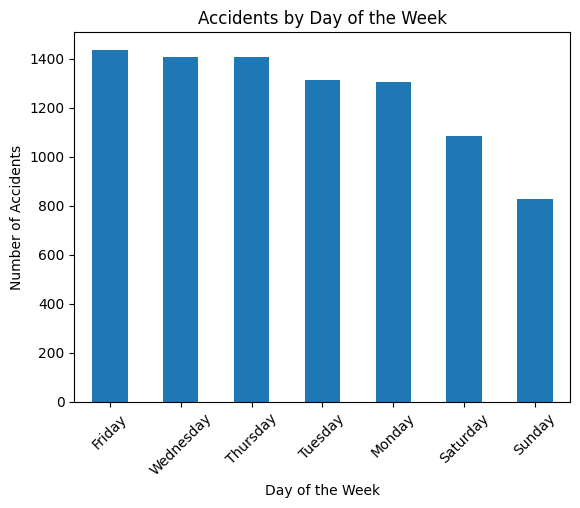

In [96]:
accidents_per_day = accidents_persona['Day_of_Week'].value_counts()
accidents_per_day = accidents_per_day.sort_values(ascending=False)
accidents_per_day.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

 # Accidents by District

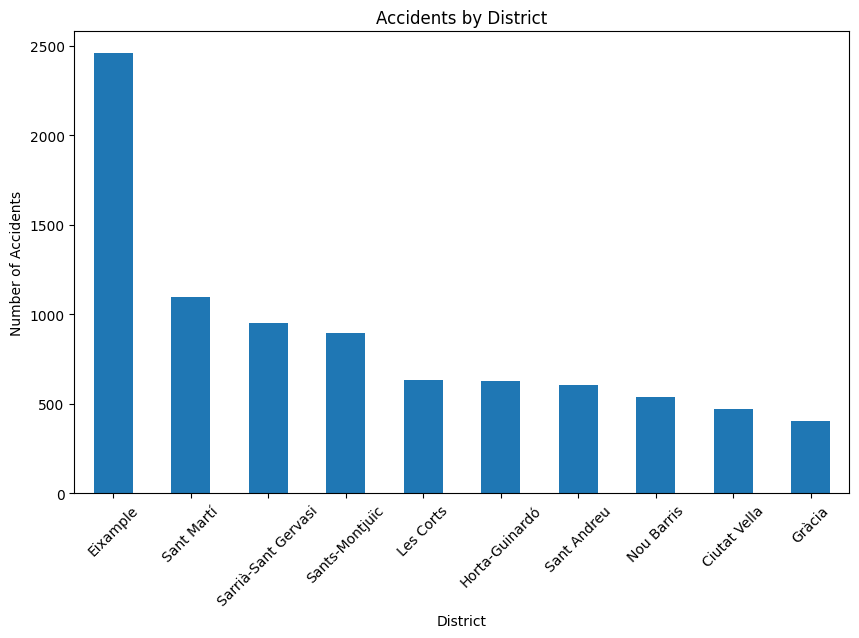

In [101]:

accidents_by_district = accidents_persona[accidents_persona['District_Name'] != 'Unknown']['District_Name'].value_counts()
accidents_by_district.plot(kind='bar', figsize=(10, 6))
plt.title('Accidents by District')
plt.xlabel('District')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

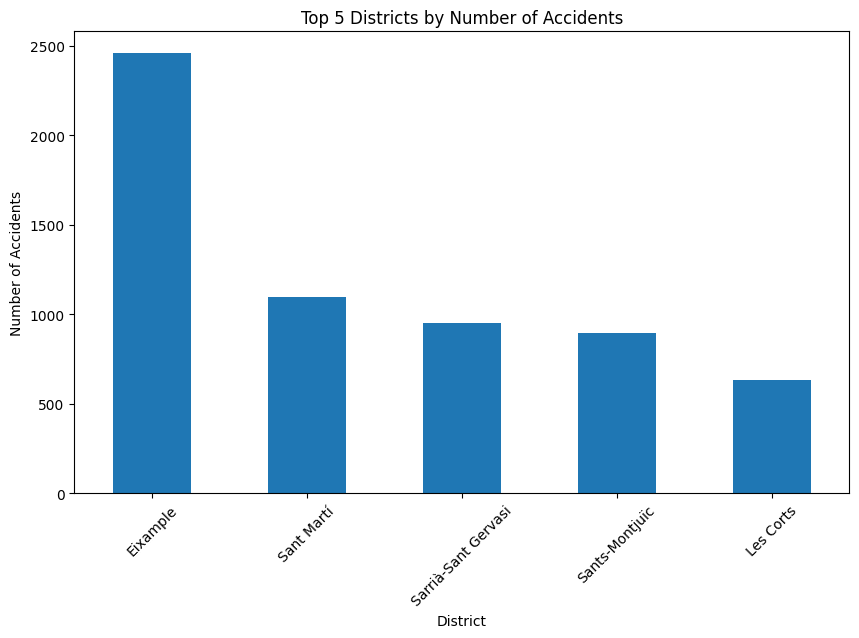

In [102]:

accidents_by_district = accidents_persona[accidents_persona['District_Name'] != 'Unknown']['District_Name'].value_counts()
top_5_districts = accidents_by_district.head(5)
top_5_districts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Districts by Number of Accidents')
plt.xlabel('District')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [112]:
import folium
from folium.plugins import MarkerCluster

# Filter data for top 5 districts
top_5_district_names = top_5_districts.index.tolist()
filtered_data = accidents_persona[
    (accidents_persona['District_Name'].isin(top_5_district_names)) &
    (accidents_persona['Latitude'].notnull()) & 
    (accidents_persona['Longitude'].notnull())
]

# Initialize the map centered around the average location
map_center = [filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

# Add a marker cluster to group points
marker_cluster = MarkerCluster().add_to(accident_map)

# Plot each accident on the map
for _, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"District: {row['District_Name']}\nAccident ID: {row['Case_Number']}",
    ).add_to(marker_cluster)

# Save or display the map
accident_map.save("accidents_map.html")  # Saves to file
accident_map  # Displays in Jupyter if supported

# Accidents by Hour of Day

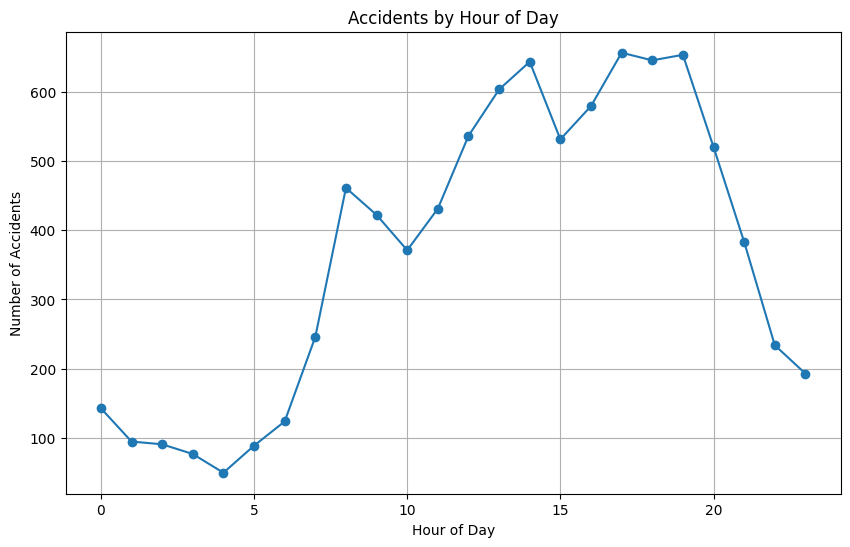

In [59]:
# Group data by 'Hour_of_Day' and count
accidents_by_hour = accidents_persona['Hour_of_Day'].value_counts().sort_index()

# Plot the data
accidents_by_hour.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

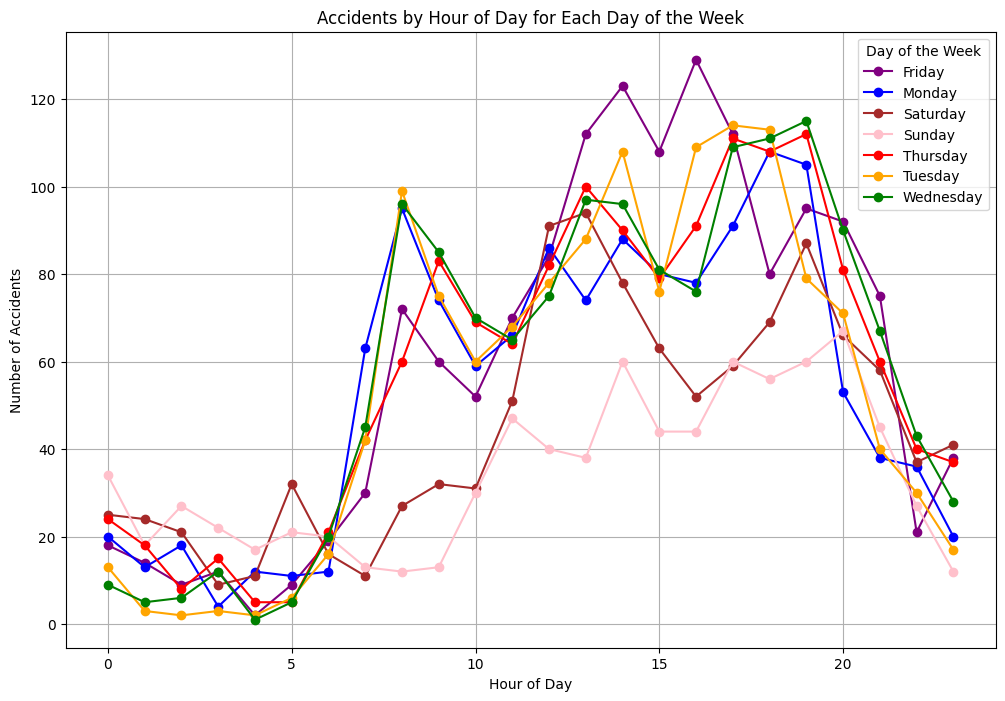

In [103]:
colors = {
    'Monday': 'blue',
    'Tuesday': 'orange',
    'Wednesday': 'green',
    'Thursday': 'red',
    'Friday': 'purple',
    'Saturday': 'brown',
    'Sunday': 'pink'
}

# Group by 'Day_of_Week' and 'Hour_of_Day'
grouped_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))

for day in grouped_data.index:
    plt.plot(
        grouped_data.columns,  # Hour of Day
        grouped_data.loc[day],  # Number of accidents for this day
        marker='o',
        label=day,
        color=colors.get(day, 'black')  # Use color map
    )

# Add titles and labels
plt.title('Accidents by Hour of Day for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

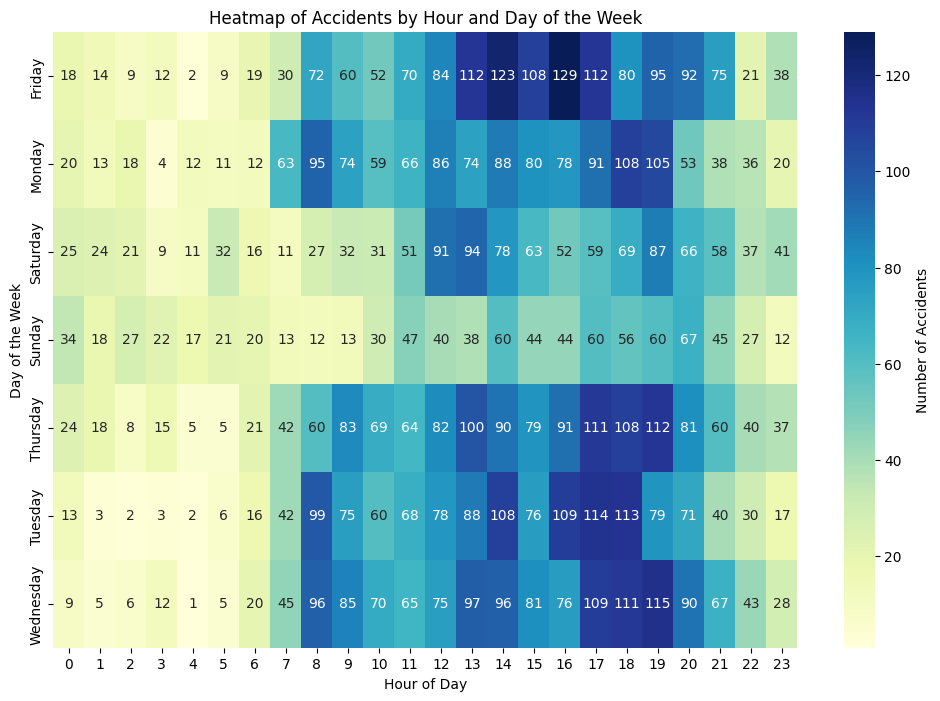

In [104]:
heatmap_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Accidents'})
plt.title('Heatmap of Accidents by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

<Figure size 1200x800 with 0 Axes>

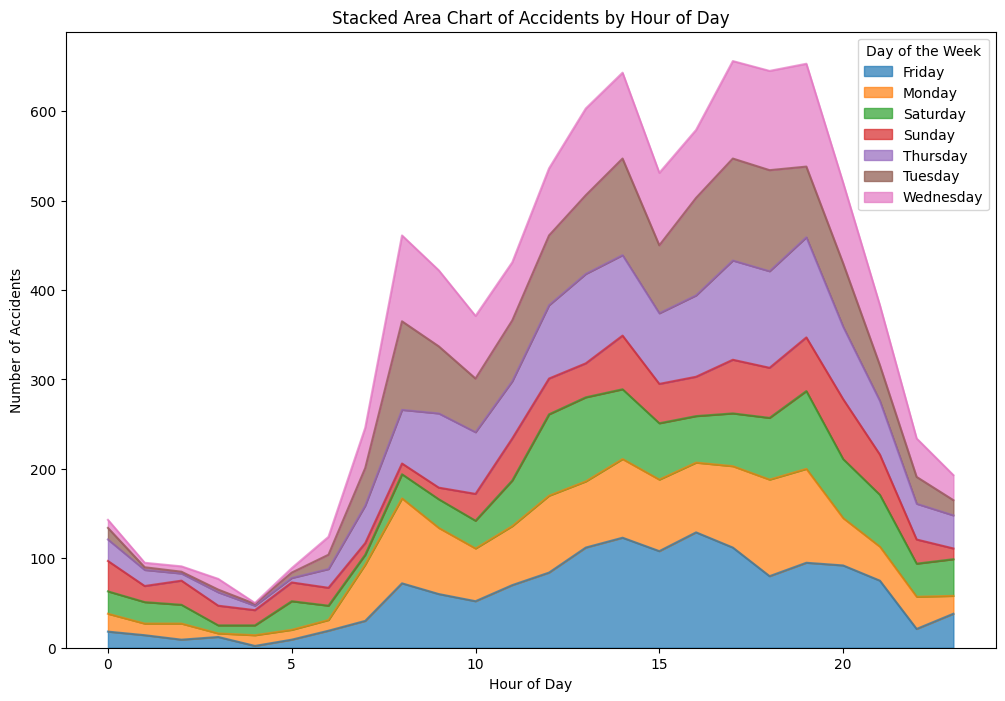

In [105]:
area_data = accidents_persona.groupby(['Hour_of_Day', 'Day_of_Week']).size().unstack(fill_value=0)

# Plot the stacked area chart
plt.figure(figsize=(12, 8))
area_data.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.7)
plt.title('Stacked Area Chart of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.show()

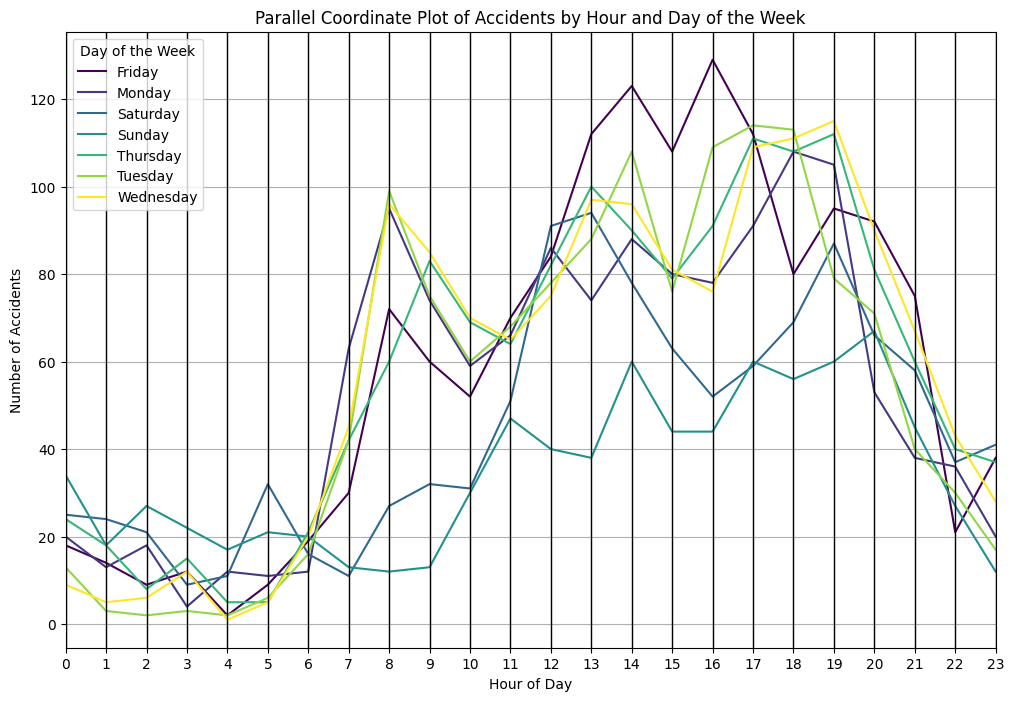

In [108]:
from pandas.plotting import parallel_coordinates

parallel_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)
parallel_data = parallel_data.reset_index()

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(parallel_data, class_column='Day_of_Week', colormap='viridis')
plt.title('Parallel Coordinate Plot of Accidents by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.show()

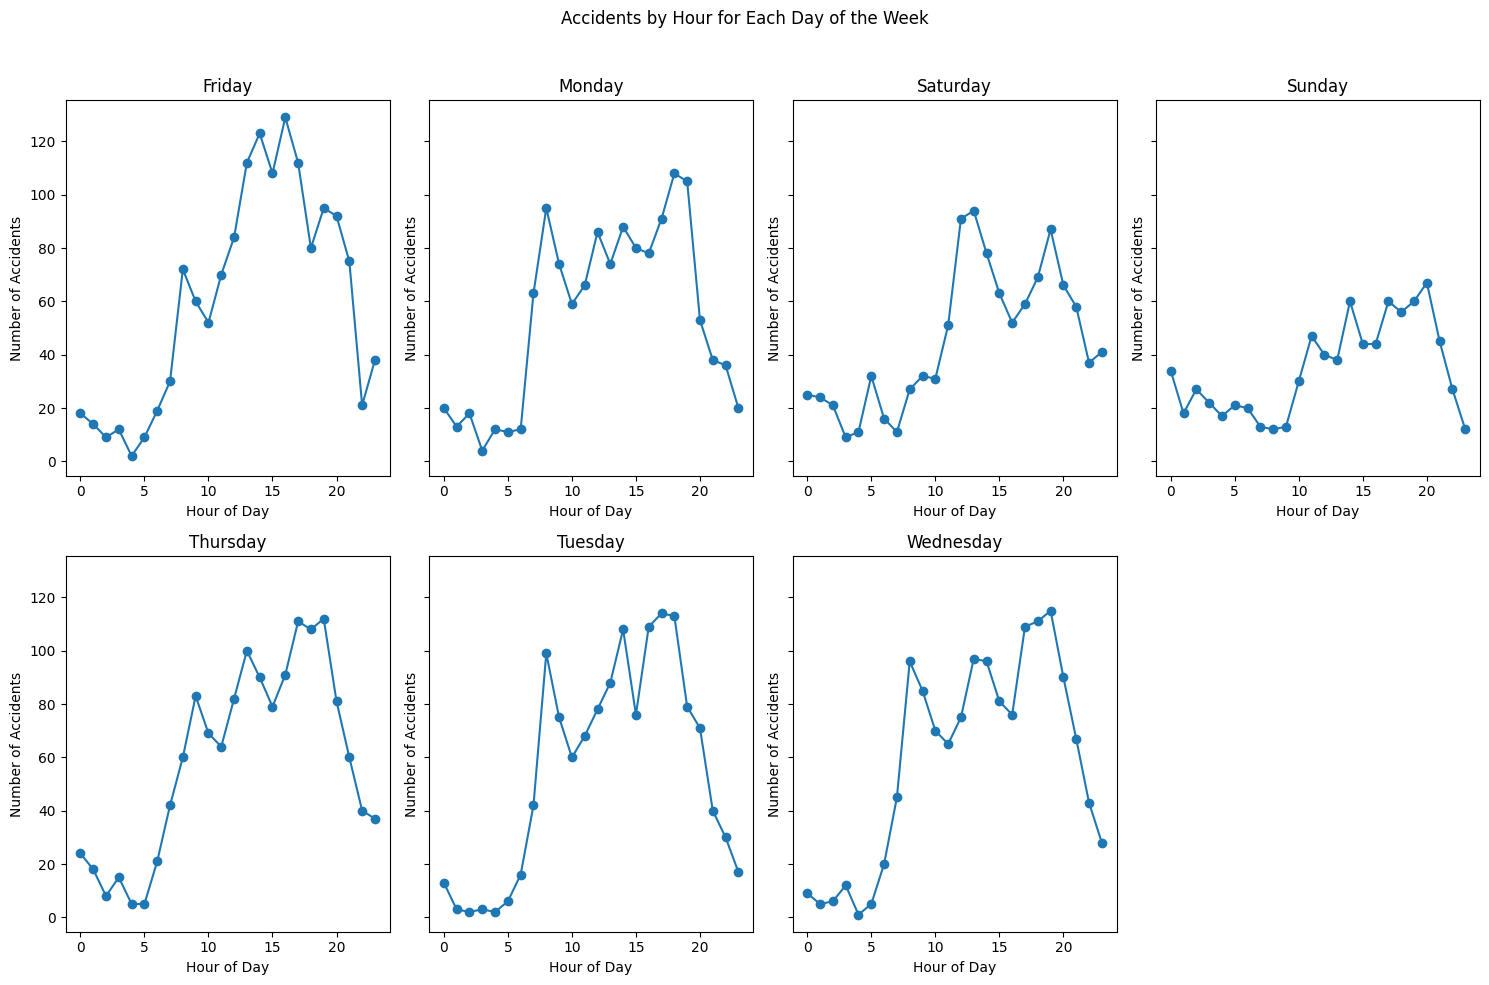

In [109]:
grouped_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)

# Plot small multiples
fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, day in enumerate(grouped_data.index):
    ax = axes[i]
    ax.plot(grouped_data.columns, grouped_data.loc[day], marker='o')
    ax.set_title(day)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Number of Accidents')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.suptitle('Accidents by Hour for Each Day of the Week')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
Gender Distribution of Victims

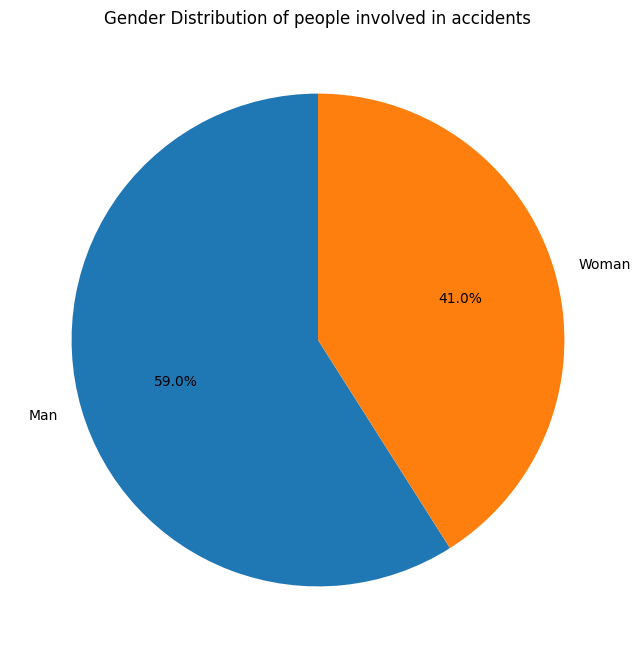

In [127]:
gender_distribution = accidents_persona['Gender_Description'].value_counts()

# Plot the data
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Gender Distribution of people involved in accidents')
plt.ylabel('')
plt.show()

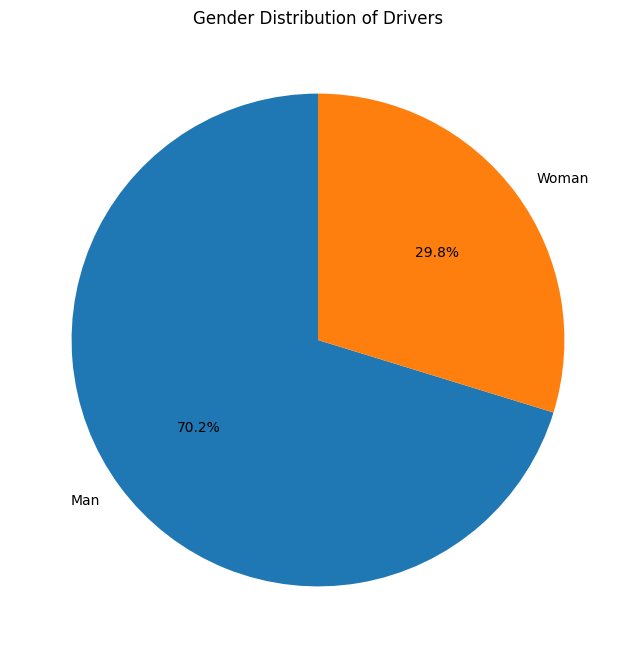

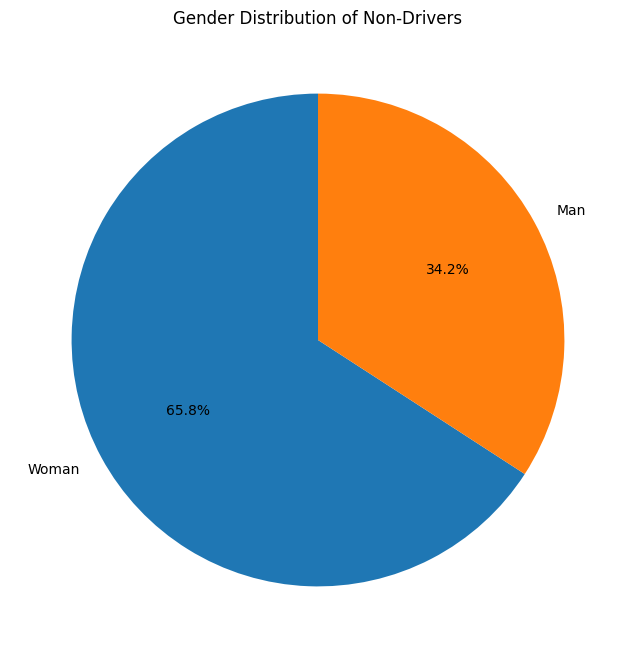

In [110]:
drivers_gender_distribution = accidents_persona[
    accidents_persona['Person_Type_Description'] == 'Driver'
]['Gender_Description'].value_counts()

# Gender distribution for non-drivers
non_drivers_gender_distribution = accidents_persona[
    accidents_persona['Person_Type_Description'] != 'Driver'
]['Gender_Description'].value_counts()

# Plot gender distribution for drivers
plt.figure(figsize=(8, 8))
drivers_gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution of Drivers')
plt.ylabel('')
plt.show()

# Plot gender distribution for non-drivers
plt.figure(figsize=(8, 8))
non_drivers_gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution of Non-Drivers')
plt.ylabel('')
plt.show()

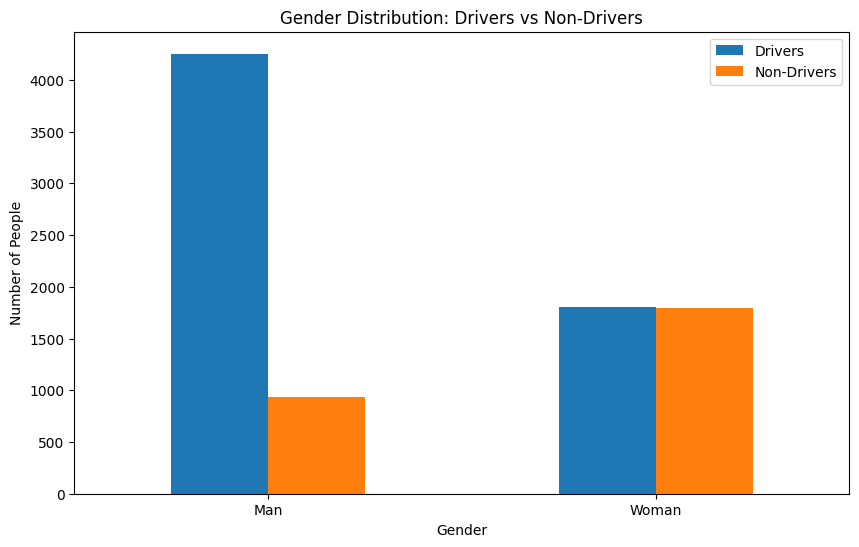

In [111]:
drivers_gender = accidents_persona[accidents_persona['Person_Type_Description'] == 'Driver']['Gender_Description'].value_counts()
non_drivers_gender = accidents_persona[accidents_persona['Person_Type_Description'] != 'Driver']['Gender_Description'].value_counts()

# Combine into a DataFrame
gender_comparison = pd.DataFrame({
    'Drivers': drivers_gender,
    'Non-Drivers': non_drivers_gender
}).fillna(0)

# Plot as a bar chart
gender_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Distribution: Drivers vs Non-Drivers')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

# Age Distribution of Victims

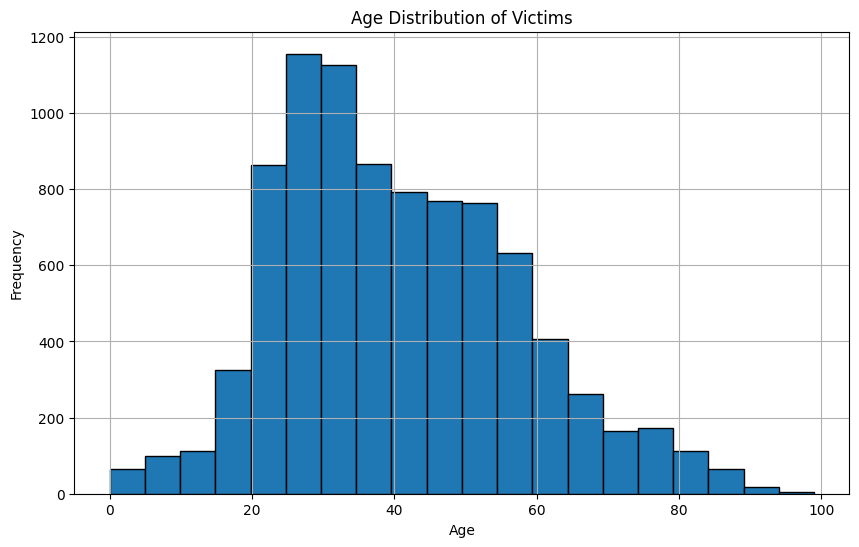

In [71]:
accidents_persona['Age'].plot(kind='hist', bins=20, figsize=(10, 6), edgecolor='black')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

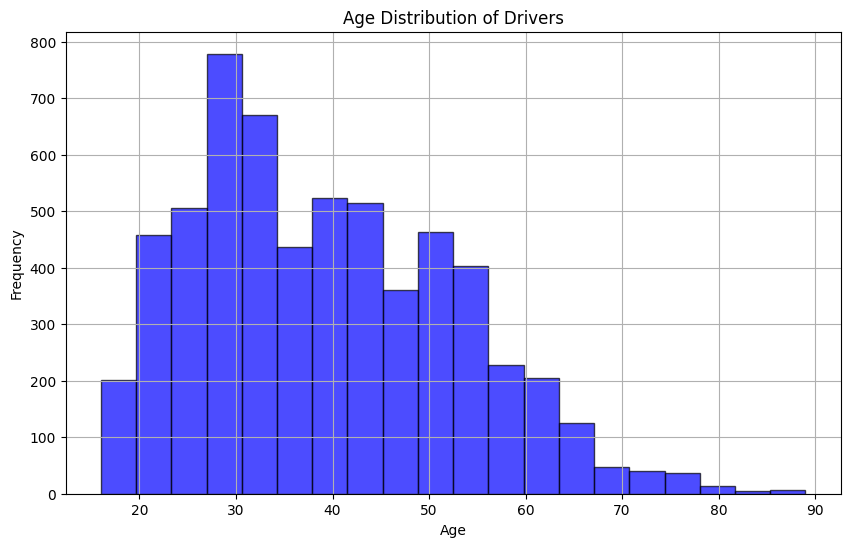

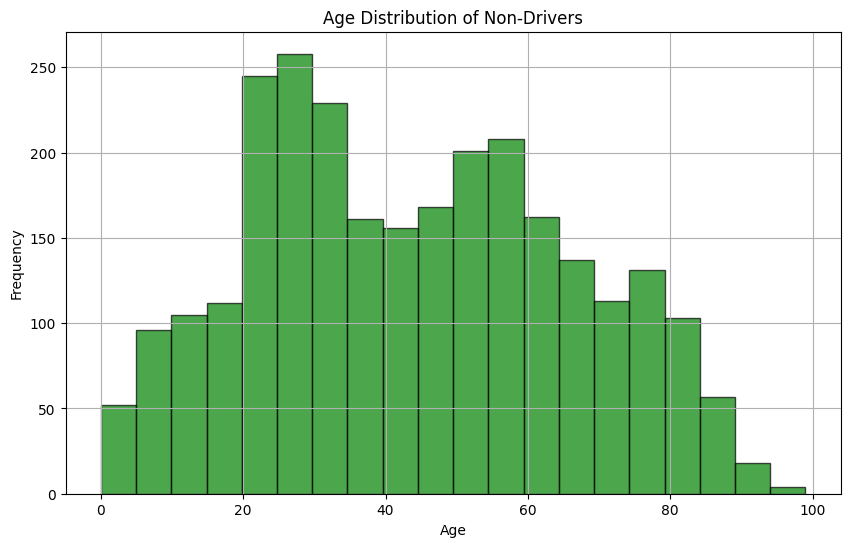

In [125]:
# Filter data for drivers
drivers_age = accidents_persona[accidents_persona['Person_Type_Description'] == 'Driver']['Age']

# Filter data for non-drivers
non_drivers_age = accidents_persona[accidents_persona['Person_Type_Description'] != 'Driver']['Age']

# Plot histogram for drivers
plt.figure(figsize=(10, 6))
drivers_age.plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for non-drivers
plt.figure(figsize=(10, 6))
non_drivers_age.plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Age Distribution of Non-Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Vehicle involved by day and hour

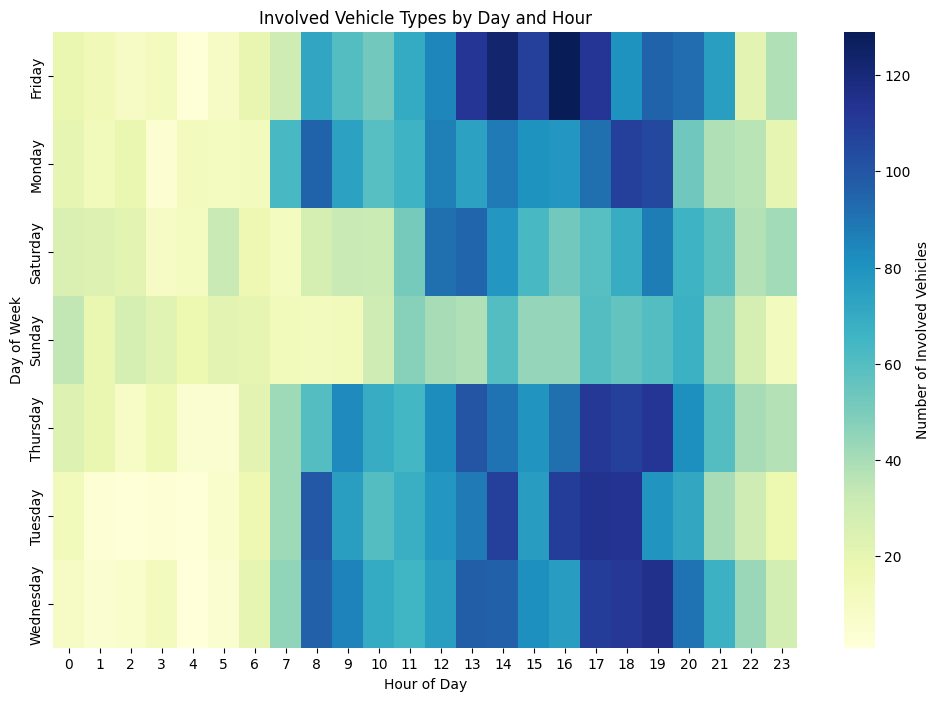

In [157]:
# Group the data by day, time, and vehicle type
vehicle_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day', 'Involved_Vehicle_Type']).size().reset_index(name='Count')

# Pivot data for heatmap (day vs. hour, counts aggregated)
heatmap_data = vehicle_data.pivot_table(index='Day_of_Week', columns='Hour_of_Day', values='Count', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Number of Involved Vehicles'})
plt.title('Involved Vehicle Types by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


### Vehicle involved by day 

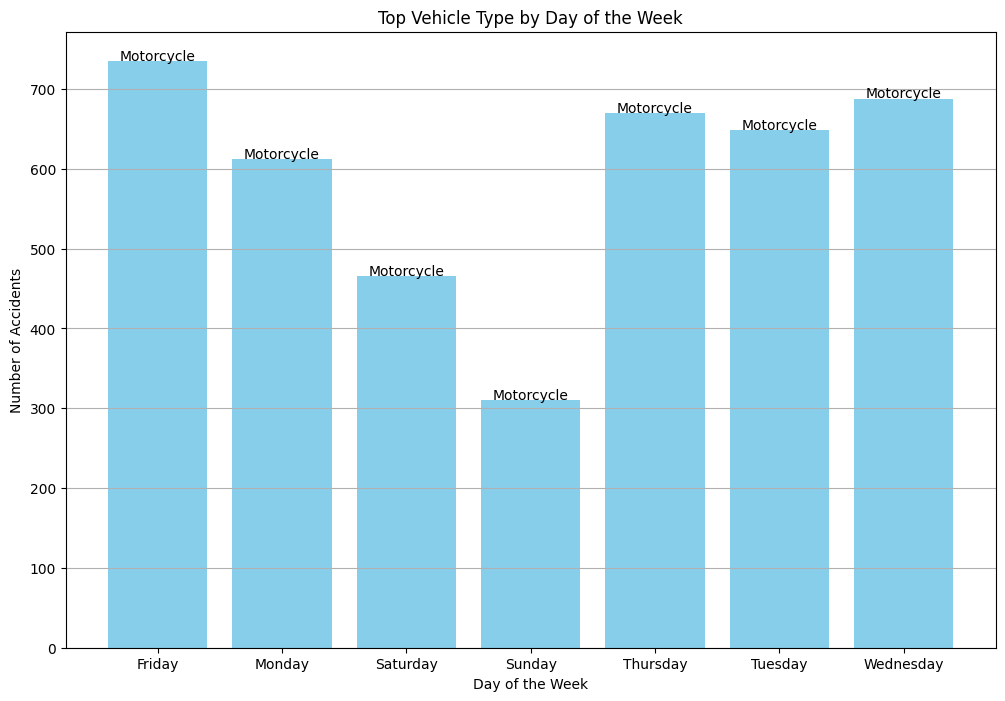

In [160]:

# Group the data by 'Day_of_Week' and 'Involved_Vehicle_Type'
vehicle_data_by_day = accidents_persona.groupby(['Day_of_Week', 'Involved_Vehicle_Type']).size().reset_index(name='Count')

# Find the top vehicle type for each day
top_vehicle_by_day = vehicle_data_by_day.loc[vehicle_data_by_day.groupby('Day_of_Week')['Count'].idxmax()]

# Plot the top vehicle types
plt.figure(figsize=(12, 8))
plt.bar(top_vehicle_by_day['Day_of_Week'], top_vehicle_by_day['Count'], color='skyblue')
for i, row in top_vehicle_by_day.iterrows():
    plt.text(row['Day_of_Week'], row['Count'] + 1, row['Involved_Vehicle_Type'], ha='center', fontsize=10)

# Add labels and title
plt.title('Top Vehicle Type by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

### Vehicle involved by hour

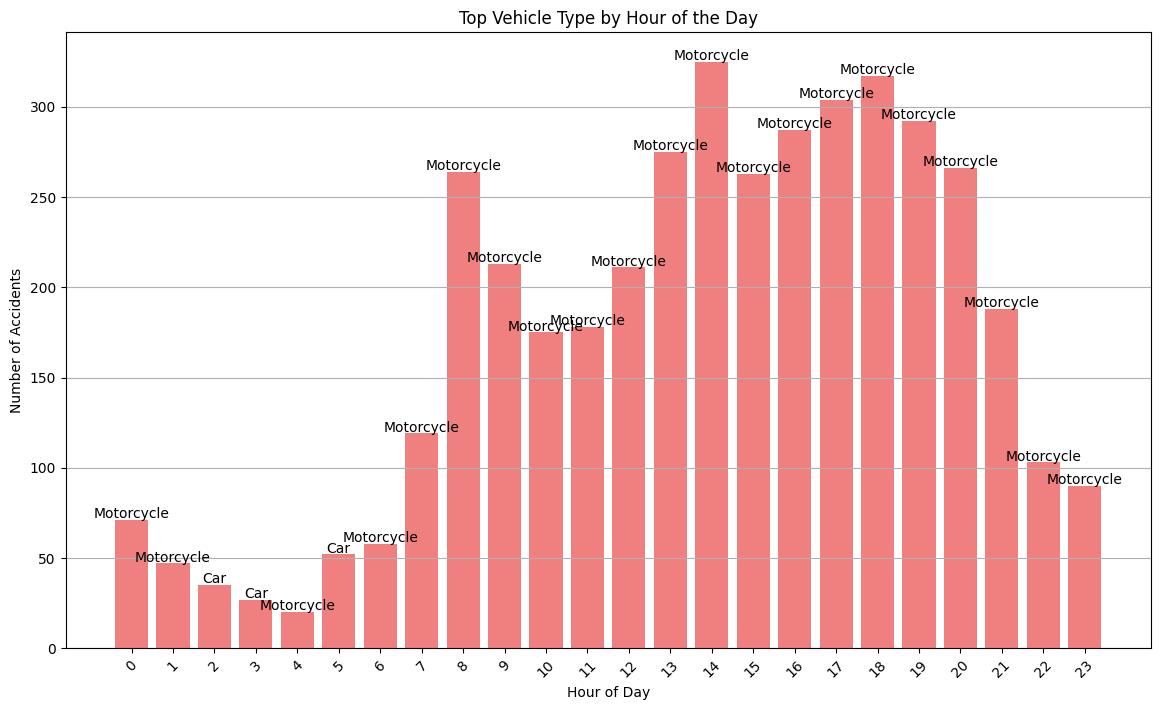

In [161]:
# Group the data by 'Hour_of_Day' and 'Involved_Vehicle_Type'
vehicle_data_by_hour = accidents_persona.groupby(['Hour_of_Day', 'Involved_Vehicle_Type']).size().reset_index(name='Count')

# Find the top vehicle type for each hour
top_vehicle_by_hour = vehicle_data_by_hour.loc[vehicle_data_by_hour.groupby('Hour_of_Day')['Count'].idxmax()]

# Plot the top vehicle types
plt.figure(figsize=(14, 8))
plt.bar(top_vehicle_by_hour['Hour_of_Day'], top_vehicle_by_hour['Count'], color='lightcoral')
for i, row in top_vehicle_by_hour.iterrows():
    plt.text(row['Hour_of_Day'], row['Count'] + 1, row['Involved_Vehicle_Type'], ha='center', fontsize=10)

# Add labels and title
plt.title('Top Vehicle Type by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24), rotation=45)
plt.grid(axis='y')
plt.show()

# Pedestrian cause top 5

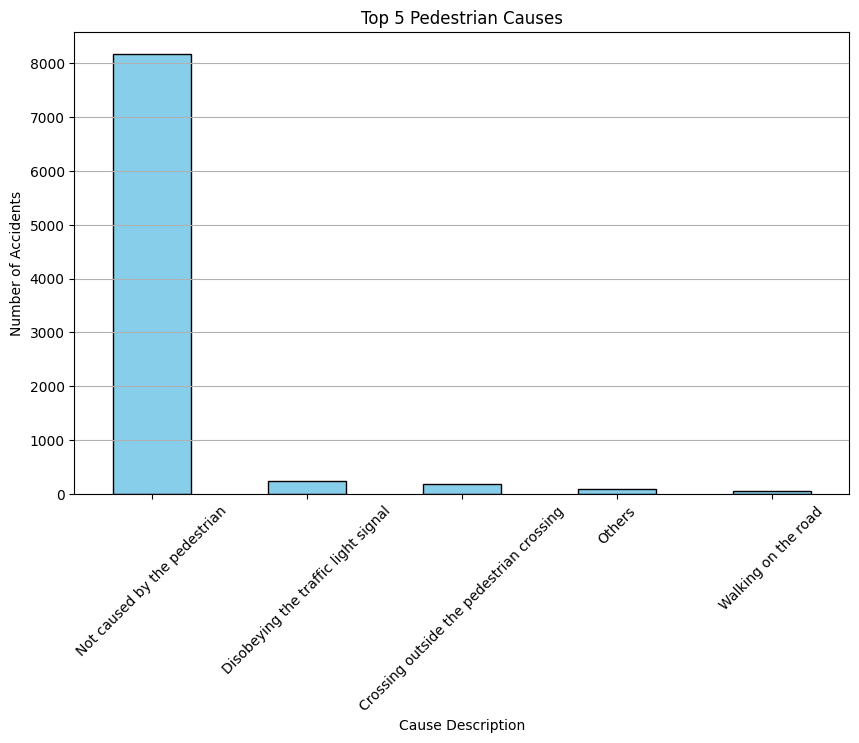

In [162]:
top_5_pedestrian_causes = accidents_persona['Pedestrian_Cause_Description'].value_counts().head(5)

# Plot the top 5 pedestrian causes
plt.figure(figsize=(10, 6))
top_5_pedestrian_causes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Pedestrian Causes')
plt.xlabel('Cause Description')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()